# Problem Set #4
MACS 30200  
Mengchen Shi  
May 28, 2018

## 1a

In [130]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
mu = 11.4
rho = 0.85

In [82]:
z = np.zeros(T)
z[0] = mu
z[0] = rho * 11.4 + (1-rho)*z[0] + eps_vec[0]
for t in range(0, T-1):
    z[t+1] = rho*z[t] + (1-rho)*mu + eps_vec[t+1]

Text(0.5,0,'t')

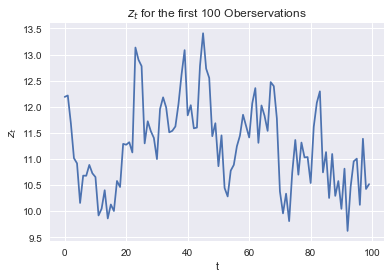

In [131]:
plt.plot(z[:100])
plt.title("$z_t$ for the first 100 Oberservations")
plt.ylabel("$z_t$")
plt.xlabel("t")

## 1b

In [84]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower,(mu-lower)/2+lower,mu,(upper-mu)/2+mu,upper])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

## 1c

In [89]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [90]:
bins = np.digitize(z, z_cuts)
P = np.zeros((5,5))
bins

array([3, 3, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2,
       3, 4, 3, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 2,
       4, 3, 3, 3, 2, 3, 4, 4, 3, 4, 4, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 2, 2, 4, 3, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2,

In [91]:
for i in range(5):
    for j in range(5):
        col = 0
        row = 0
        for k in range(T-1):
            curr = bins[k]
            nxt = bins[k+1]
            if curr == i:
                row += 1
            if curr == i and nxt == j:
                col += 1
        P[i][j] = col/row

In [92]:
print("The Markov transition matrix P is: ")
print(P)

The Markov transition matrix P is: 
[[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.03067485 0.2208589  0.48466258 0.22699387 0.03680982]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


## 1d

In [93]:
import numpy.linalg as LA

z_t = np.array([0,0,1,0,0]).reshape(5,1)
z_tp3 = LA.matrix_power(P.T,3) @ z_t
print("P(z_{t+3}=5|z_t=3) = ")
print(z_tp3[-1])

P(z_{t+3}=5|z_t=3) = 
[0.08021671]


# 1e

In [95]:
eigvals, eigvecmat = LA.eig(P.T)
print(eigvals)
print(eigvecmat)

[1.         0.76699244 0.576021   0.12361033 0.3702847 ]
[[-0.21569643 -0.55748862  0.47214975 -0.01733209 -0.17180269]
 [-0.49786427 -0.47702859 -0.39566684  0.37212405  0.68729659]
 [-0.66477792  0.09672098 -0.6316733  -0.78981484 -0.24150297]
 [-0.47579105  0.54815821  0.09402908  0.484713   -0.58546399]
 [-0.19313059  0.38963802  0.4611613  -0.04969012  0.31147306]]


In [136]:
eigvec = eigvecmat[:, 0] / eigvecmat[:, 0].sum()
stat_dist = eigvec
print("The stationary (long-run, ergodic) distribution of z_t is", stat_dist)

The stationary (long-run, ergodic) distribution of z_t is [0.10535858 0.24318563 0.32471588 0.23240379 0.09433612]


# 1f

In [116]:
z_0 = z_vals[2]
z_t = z_0
zt_ind = 1
z_vec = np.zeros(T)
for t_ind in range(T):
    # Calculate new index and new value
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

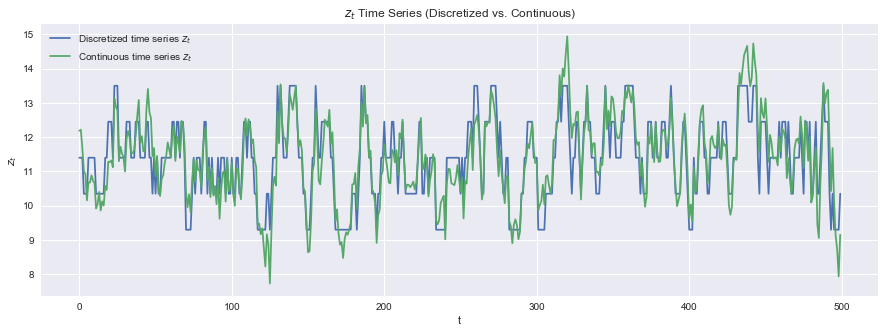

In [139]:
plt.figure(figsize=(15,5))
plt.plot(z_vec, label="Discretized time series $z_t$")
plt.plot(z, label="Continuous time series $z_t$")
plt.title("$z_t$ Time Series (Discretized vs. Continuous)")
plt.ylabel("$z_t$")
plt.xlabel("t")
plt.legend()